# Ripple Price

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/raw/bitcoin/ripple_price.csv')

In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1489,"Aug 08, 2013",0.004397,0.004424,0.004175,0.004254,-,"34,372,500"
1490,"Aug 07, 2013",0.004669,0.004682,0.004333,0.004417,-,"36,503,500"
1491,"Aug 06, 2013",0.005637,0.005661,0.004629,0.004680,-,"44,067,600"
1492,"Aug 05, 2013",0.005875,0.005980,0.005613,0.005613,-,"45,928,400"
1493,"Aug 04, 2013",0.005874,0.005927,0.005874,0.005882,-,"45,921,000"


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [5]:
df.count()

Date          1494
Open          1494
High          1494
Low           1494
Close         1494
Volume        1494
Market Cap    1494
dtype: int64

In [6]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

There are missing data on Volume column and we can see the format data is not same. Some of the data do not use number format.

In [7]:
df['Volume'] = df['Volume'].replace('-', 'NaN')
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',','')))
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

Convert time column into date time format

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1489,2013-08-08,0.004397,0.004424,0.004175,0.004254,NaN,34372500.0
1490,2013-08-07,0.004669,0.004682,0.004333,0.004417,NaN,36503500.0
1491,2013-08-06,0.005637,0.005661,0.004629,0.004680,NaN,44067600.0
1492,2013-08-05,0.005875,0.005980,0.005613,0.005613,NaN,45928400.0
1493,2013-08-04,0.005874,0.005927,0.005874,0.005882,NaN,45921000.0


In [10]:
df.count()

Date          1494
Open          1494
High          1494
Low           1494
Close         1494
Volume        1349
Market Cap    1494
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 7 columns):
Date          1494 non-null datetime64[ns]
Open          1494 non-null float64
High          1494 non-null float64
Low           1494 non-null float64
Close         1494 non-null float64
Volume        1349 non-null float64
Market Cap    1494 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 81.8 KB


In [12]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,145,0.097055
Market Cap,0,0.000000


I try to fill in the missing value by interpolated the data

<function matplotlib.pyplot.show(*args, **kw)>

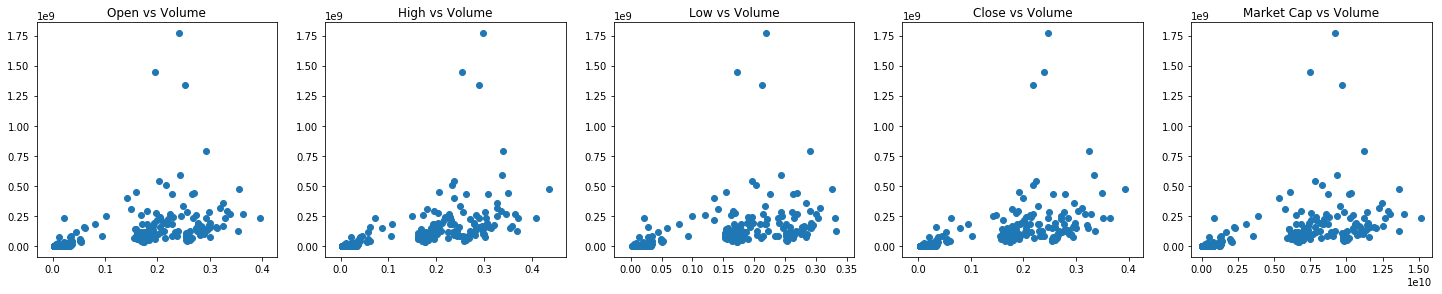

In [14]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
H = df['High']
L = df['Low']
C = df['Close']
V = df['Volume']
MC = df['Market Cap']

plt.subplot(5,5,1)
plt.scatter(O, V)
plt.title('Open vs Volume')

plt.subplot(5,5,2)
plt.scatter(H, V)
plt.title('High vs Volume')

plt.subplot(5,5,3)
plt.scatter(L, V)
plt.title('Low vs Volume')

plt.subplot(5,5,4)
plt.scatter(C, V)
plt.title('Close vs Volume')

plt.subplot(5,5,5)
plt.scatter(MC, V)
plt.title('Market Cap vs Volume')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the figure above we can see that Volume almost has same condition with other column

In [16]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:1349]
Volume = df['Volume'].iloc[0:1349]

In [17]:
#Train model 
model.fit(Open, Volume)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Volume)

0.3954123943387296

In [19]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Volume_Predict = model.predict(open)
df['Volume Predict'] = Volume_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Volume Predict
1489,2013-08-08,0.004397,0.004424,0.004175,0.004254,NaN,34372500.0,-1.537574e+06
1490,2013-08-07,0.004669,0.004682,0.004333,0.004417,NaN,36503500.0,-1.291073e+06
1491,2013-08-06,0.005637,0.005661,0.004629,0.004680,NaN,44067600.0,-4.138192e+05
1492,2013-08-05,0.005875,0.005980,0.005613,0.005613,NaN,45928400.0,-1.981307e+05
1493,2013-08-04,0.005874,0.005927,0.005874,0.005882,NaN,45921000.0,-1.990369e+05


In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Volume Predict
0,2017-09-05,0.205110,0.218674,0.190232,0.215189,242636000.0,7.864700e+09,1.803594e+08
1,2017-09-04,0.228781,0.228781,0.195960,0.204968,239613000.0,8.772340e+09,2.018114e+08
2,2017-09-03,0.227229,0.236443,0.218662,0.228811,186526000.0,8.712840e+09,2.004049e+08
3,2017-09-02,0.249348,0.249680,0.217774,0.226669,329928000.0,9.560940e+09,2.204503e+08
4,2017-09-01,0.255803,0.256162,0.243833,0.248479,283576000.0,9.808460e+09,2.263002e+08


Here I make a new column Volume Predict which contains Volume with no NaN value

In [21]:
df.count()

Date              1494
Open              1494
High              1494
Low               1494
Close             1494
Volume            1349
Market Cap        1494
Volume Predict    1494
dtype: int64

The data is clean, no null value and has same format